In [3]:
import os
import random
import seaborn as sns
import csv
import numpy as np
import copy
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pandas as pd
from scipy import stats
%matplotlib inline

In [ ]:
#ICI MODIFIER LA PATH DU REPOSITORY
file_path="C:/Users/Zeta/Documents/acou_sommeil_HD_ENS/tinnitus-nocturnal-stimulation"

# Récupération des données depuis les CSV

In [4]:
df_matin={}
os.chdir(file_path+"/df_matin")
files = os.listdir(file_path+"/df_matin")
for file in files:
    df_matin[file.split("_")[0]]=pd.read_csv(file, sep=";")
print("exemple matin")
print(df_matin["1ZN04"])

print("")

df_soir={}
os.chdir(file_path+"/df_soir")
files = os.listdir(file_path+"/df_soir")
for file in files:
    df_soir[file.split("_")[0]]=pd.read_csv(file, sep=";")
print("exemple soir")
print(df_soir["1ZN04"])

exemple matin
   Patient ID  relative date  masking volume  VAS-L  VAS-I  \
0       1ZN04            -22        7.333333    2.0    1.0   
1       1ZN04            -21        5.000000    3.0    2.0   
2       1ZN04            -21        5.000000    3.0    2.0   
3       1ZN04            -20        5.666667    NaN    NaN   
4       1ZN04            -19        5.000000    4.0    3.0   
5       1ZN04            -18        4.666667    5.0    3.0   
6       1ZN04            -17        4.666667    3.0    2.0   
7       1ZN04            -16        4.666667    2.0    2.0   
8       1ZN04            -15        5.333333    3.0    3.0   
9       1ZN04             -3        4.000000    4.0    2.0   
10      1ZN04             -1        5.333333    3.0    2.0   
11      1ZN04              0        4.666667    3.0    2.0   
12      1ZN04              2        4.666667    3.0    1.0   
13      1ZN04              3        5.333333    3.0    2.0   
14      1ZN04              4        4.333333    3.0    2

# Travail sur le masquage

# Test inter-sujet entre distribution post habituation et distribution post intervention

In [5]:
#On calcule directement la distribution des différences plutôt que de prendre 2 distributions pairées
distrib_test_moins_hab_matin=[]
distrib_test_moins_hab_soir=[]

# Pour l'affichage
distrib_hab_matin=[]
distrib_test_matin=[]
distrib_hab_soir=[]
distrib_test_soir=[]

for elm in df_matin:
    flag=0
    for index, row in df_matin[elm].iterrows():
        if row["relative date"] == -1:
            distrib_hab_matin.append(float(row["masking volume"]))
            flag+=1
        if row["relative date"] == 0:
            distrib_test_matin.append(float(row["masking volume"]))
            flag+=1
        if flag==2:
            distrib_test_moins_hab_matin.append(distrib_test_matin[-1]- distrib_hab_matin[-1])
            break
            
print(distrib_test_moins_hab_matin)
print(len(distrib_test_moins_hab_matin))


for elm in df_soir:
    flag=0
    for index, row in df_soir[elm].iterrows():
        if row["relative date"] == -1:
            distrib_hab_soir.append(float(row["masking volume"]))
            flag+=1
        if row["relative date"] == 0:
            distrib_test_soir.append(float(row["masking volume"]))
            flag+=1
        if flag==2:
            distrib_test_moins_hab_soir.append(distrib_test_soir[-1]- distrib_hab_soir[-1])
            break
            
print(distrib_test_moins_hab_soir)
print(len(distrib_test_moins_hab_soir))




[-16.333333333333332, -0.33333333333333304, -4.0, -18.33333333333333, 0.0, -10.0, -1.0, -11.333333333333329, 10.666666666666671, 8.333333333333332, -15.666666666666657, -1.666666666666667, -1.9999999999999991, -0.6666666666666661]
14
[-10.666666666666664, 0.0, -1.6666666666666572, -4.3333333333333215, -4.9999999999999964, -14.333333333333329, 9.666666666666671, -2.0, 8.666666666666671, 9.333333333333329, 1.0000000000000004, 0.0, 0.6666666666666661]
13


# Affichage des distributions

Text(0.5, 1.0, 'Distribution of differences of masking volume between habituation evening and post intervention evening')

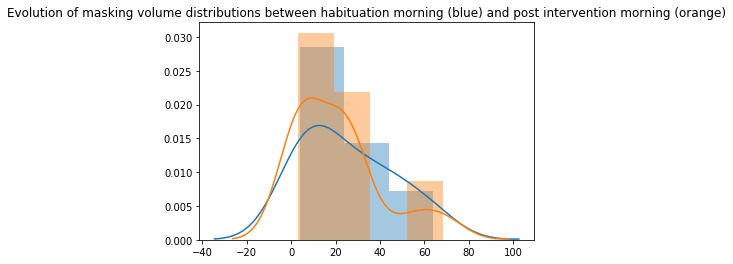

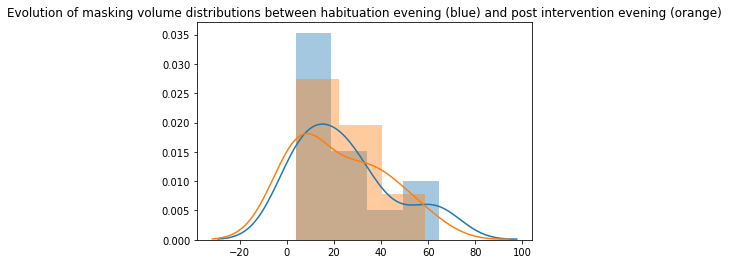

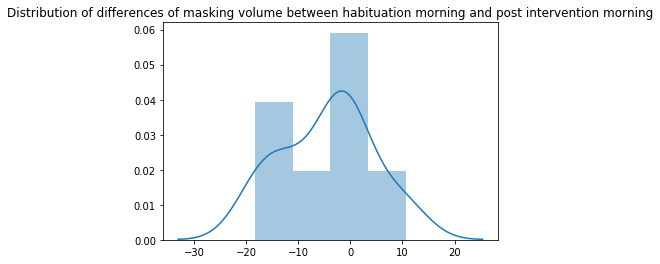

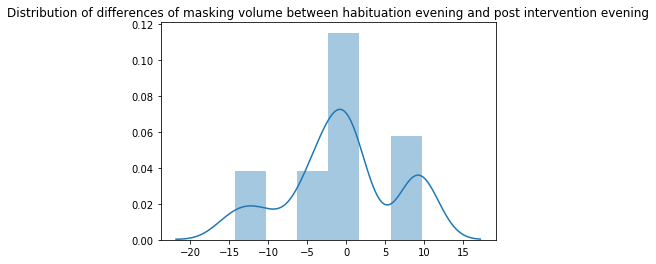

In [6]:
# Evolution des distributions sans pairing
plt.figure()
sns.distplot(distrib_hab_matin)
sns.distplot(distrib_test_matin)
plt.title("Evolution of masking volume distributions between habituation morning (blue) and post intervention morning (orange)")

plt.figure()
sns.distplot(distrib_hab_soir)
sns.distplot(distrib_test_soir)
plt.title("Evolution of masking volume distributions between habituation evening (blue) and post intervention evening (orange)")

#Représentation des distribution des différences
plt.figure()
sns.distplot(distrib_test_moins_hab_matin)
plt.title("Distribution of differences of masking volume between habituation morning and post intervention morning")

plt.figure()
sns.distplot(distrib_test_moins_hab_soir)
plt.title("Distribution of differences of masking volume between habituation evening and post intervention evening")



# Test statistiques

In [7]:
print("Pour matin hab VS matin test")
print(stats.ttest_1samp(distrib_test_moins_hab_matin, 0))
print(stats.wilcoxon(distrib_test_moins_hab_matin))

print("Pour soir hab VS soir test")
print(stats.ttest_1samp(distrib_test_moins_hab_soir, 0))
print(stats.wilcoxon(distrib_test_moins_hab_soir))

Pour matin hab VS matin test
Ttest_1sampResult(statistic=-1.8930237572272404, pvalue=0.08082916041898561)
WilcoxonResult(statistic=16.0, pvalue=0.03924327615032667)
Pour soir hab VS soir test
Ttest_1sampResult(statistic=-0.33410762783382136, pvalue=0.7440648846050348)
WilcoxonResult(statistic=27.0, pvalue=0.5937116848746409)


# Le t test n'est pas significatif, mais il est 2 sided pour l'instant, alors que nos hypothèses suggèrent une réduction de l'acouphène, donc on devrait pouvoir faire un test one sided, ce qui diviserait la p-value par 2, à notre avantage, let  test deviendrait significatif.

# Travail sur les VAS

In [8]:
#On calcule directement la distribution des différences plutôt que de prendre 2 distributions pairées
distrib_test_moins_hab_VAS_L=[]
distrib_test_moins_hab_VAS_I=[]

# Pour l'affichage
distrib_hab_VAS_L=[]
distrib_test_VAS_L=[]
distrib_hab_VAS_I=[]
distrib_test_VAS_I=[]

for elm in df_matin:
    flag=0
    for index, row in df_matin[elm].iterrows():
        if row["relative date"] == -1:
            distrib_hab_VAS_L.append(float(row["VAS-L"]))
            distrib_hab_VAS_I.append(float(row["VAS-I"]))
            flag+=1
        if row["relative date"] == 0:
            distrib_test_VAS_L.append(float(row["VAS-L"]))
            distrib_test_VAS_I.append(float(row["VAS-I"]))
            flag+=1
        if flag==2:
            distrib_test_moins_hab_VAS_L.append(distrib_test_VAS_L[-1]- distrib_hab_VAS_L[-1])
            distrib_test_moins_hab_VAS_I.append(distrib_test_VAS_I[-1]- distrib_hab_VAS_I[-1])
            break
            
print(distrib_test_moins_hab_VAS_L)
print(len(distrib_test_moins_hab_VAS_L))

print(distrib_test_moins_hab_VAS_I)
print(len(distrib_test_moins_hab_VAS_I))

[-4.0, -2.0, -1.0, -3.0, 0.0, 0.0, 0.0, -2.0, 1.0, 2.0, 0.0, 0.0, -1.0, 0.0]
14
[-3.0, -3.0, 0.0, -3.0, 1.0, 3.0, 0.0, -2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
14


# Affichage des distributions

Text(0.5, 1.0, 'Distribution of differences of VAS_I between habituation morning and post intervention morning')

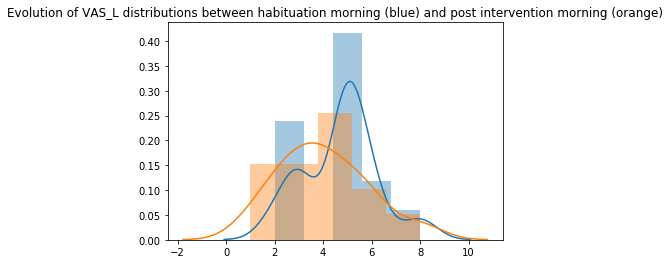

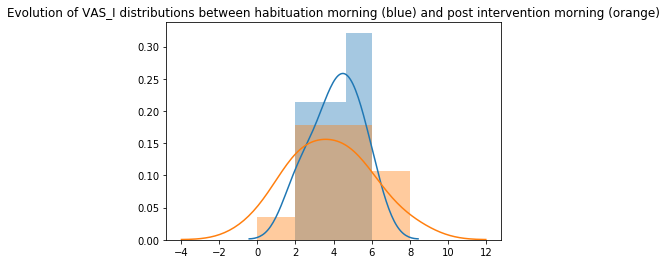

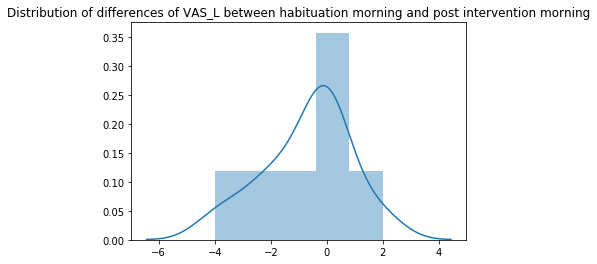

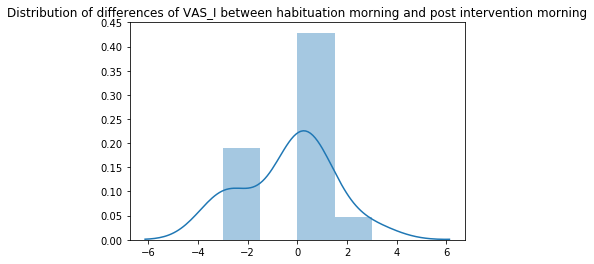

In [9]:
# Evolution des distributions sans pairing
plt.figure()
sns.distplot(distrib_hab_VAS_L)
sns.distplot(distrib_test_VAS_L)
plt.title("Evolution of VAS_L distributions between habituation morning (blue) and post intervention morning (orange)")

plt.figure()
sns.distplot(distrib_hab_VAS_I)
sns.distplot(distrib_test_VAS_I)
plt.title("Evolution of VAS_I distributions between habituation morning (blue) and post intervention morning (orange)")

#Représentation des distribution des différences
plt.figure()
sns.distplot(distrib_test_moins_hab_VAS_L)
plt.title("Distribution of differences of VAS_L between habituation morning and post intervention morning")

plt.figure()
sns.distplot(distrib_test_moins_hab_VAS_I)
plt.title("Distribution of differences of VAS_I between habituation morning and post intervention morning")



# Tests statistiques

In [10]:
print("Pour VAS_L matin hab VS matin test")
print(stats.ttest_1samp(distrib_test_moins_hab_VAS_L, 0))
print(stats.wilcoxon(distrib_test_moins_hab_VAS_L))

print("Pour VAS_I matin hab VS matin test")
print(stats.ttest_1samp(distrib_test_moins_hab_VAS_I, 0))
print(stats.wilcoxon(distrib_test_moins_hab_VAS_I))

Pour VAS_L matin hab VS matin test
Ttest_1sampResult(statistic=-1.6810969503635829, pvalue=0.11659718557792907)
WilcoxonResult(statistic=7.0, pvalue=0.11979493042591832)
Pour VAS_I matin hab VS matin test
Ttest_1sampResult(statistic=-0.7505053179263302, pvalue=0.4663181240369474)
WilcoxonResult(statistic=12.5, pvalue=0.43320586241890346)


C:\Users\Zeta\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [43]:
# Dommage, pas significatif

In [45]:
# Suite du travail : 
#1) tests stats par rapport à la "distribution de référence"
# 2) Tests en intra-sujet et combinaison des p_vals

# Fonction d'estimation de la distribution de référence sur la période avant la prise en charge

In [50]:
df = df_matin
column = "masking volume"
THR_exclude=4

def create_distrib_ref(df, column, days_THR_exclude=4):
    distrib_ref={}
    for elm in df:

        distrib_pre_intervention=[]
        #Creation de la distribution de référence
        for index, row in df[elm].iterrows():
            if row['relative date'] < -1: # journée 
                if not np.isnan(row[column]):
                    distrib_pre_intervention.append(row[column])
            # petite économie du parcours des df, pressupose que les df soient rangées suivant l'index de relative date
            if row['relative date'] >= -1:
                break
        if len(distrib_pre_intervention)>=days_THR_exclude: #only if there is a minimum number of measurements
            #averaging all values before arrival at hospital
            mean_ref = np.mean(distrib_pre_intervention)
            #Ajout de la valeur moyenne individuelle à la distribution des moyennes du groupe, référence:
            distrib_ref[elm] = mean_ref
    return distrib_ref



# Fonction de tests statistiques entre les distributions quotidiennes sur le groupe de patients et la distribution de référence

In [62]:
def make_daily_statistical_tests_and_display(df, distrib_ref, column, subj_THR_exclude=7):
    
    li_distrib_diff=[[] for i in range(25)] #ATTENTION HARCODED: 25, nombre de jours maximal de mesure après intervention
    #Creation des distribution de différence pairée entre mesure du jour i et de la distribution de référence
    for elm in df:
        if list(distrib_ref.keys()).__contains__(elm):
            for index, row in df[elm].iterrows():
                if row['relative date'] >= -1:
                    if not np.isnan(row[column]):
                        li_distrib_diff[row['relative date']].append(row[column] - distrib_ref[elm])

    #Replacement de la nuit d'habituation (-1) au début de la list des distribution
    li_distrib_diff.insert(0,li_distrib_diff[-1])
    li_distrib_diff.pop(-1)
    
    #Calculs des statistique pour chaque distribution de différence pairée
    compt=-1
    li_wilcoxon=[]
    for distrib in li_distrib_diff:
        if len(distrib)>=subj_THR_exclude:
            print("test unilatéral de différence avec la distribution de référence pour le jour " + str(compt) )
            print("0 étant le jour post intervention" )
            #Le if sert pour rendre le test unilatéral à gauche (valeur moyenne de la distribution < 0)
            if np.mean(distrib)<0:
                print("Student T-Test : ")
                print(stats.ttest_1samp(distrib, 0)[1]/2)

                wilco = stats.wilcoxon(distrib)[1]/2
                print("Wilcoxon T-test :")
                print(wilco)
                print("")
                li_wilcoxon.append(wilco)
            else: #test unilatéral, cas si la moyenne est supérieure à 0
                print("Student T-Test : ")
                print(1 - stats.ttest_1samp(distrib, 0)[1]/2)
                wilco = 1 - stats.wilcoxon(distrib)[1]/2
                print("Wilcoxon T-test :")
                print(wilco)
                print("")
                li_wilcoxon.append(wilco)
            compt+=1
            
    #Affichage
    li_sign = [0.05 for i in range(len(li_wilcoxon))]
    plt.figure()        
    plt.plot([i-1 for i in range(len(li_wilcoxon))], li_wilcoxon)
    plt.plot([i-1 for i in range(len(li_wilcoxon))],li_sign)
    plt.title("Evolution of p_values post intervention, day -1 corresponding to post habituation day, 0, to post-intervention, orange line for 0.05 significative threshold ")
    plt.xlabel("days relative to post intervention")
    plt.ylabel("p_values")

# Tests stats for morning masking volume comparing to pre-intervention baseline

test unilatéral de différence avec la distribution de référence pour le jour -1
0 étant le jour post intervention
Student T-Test : 
0.4780991706546188
Wilcoxon T-test :
0.5

test unilatéral de différence avec la distribution de référence pour le jour 0
0 étant le jour post intervention
Student T-Test : 
0.034317310767307874
Wilcoxon T-test :
0.020694702004574652

test unilatéral de différence avec la distribution de référence pour le jour 1
0 étant le jour post intervention
Student T-Test : 
0.05072686835632431
Wilcoxon T-test :
0.05706416388111932

test unilatéral de différence avec la distribution de référence pour le jour 2
0 étant le jour post intervention
Student T-Test : 
0.23309358703917843
Wilcoxon T-test :
0.22063406666446483

test unilatéral de différence avec la distribution de référence pour le jour 3
0 étant le jour post intervention
Student T-Test : 
0.5014721025666247
Wilcoxon T-test :
0.5705684935860557

test unilatéral de différence avec la distribution de référence po

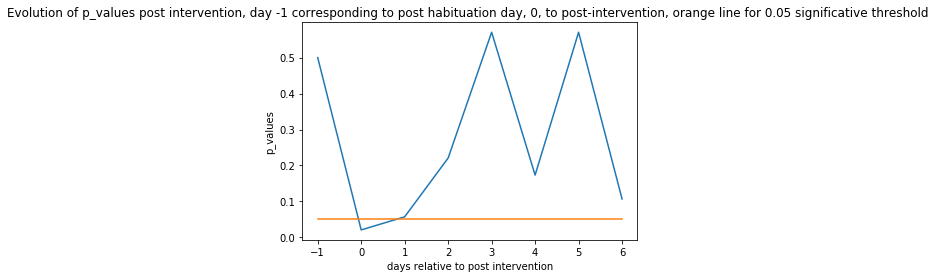

In [63]:
df = df_matin
column = "masking volume"
distrib_ref = create_distrib_ref(df, column)
make_daily_statistical_tests_and_display(df, distrib_ref, column)


# Tests stats for evening masking volume comparing to pre-intervention baseline

test unilatéral de différence avec la distribution de référence pour le jour -1
0 étant le jour post intervention
Student T-Test : 
0.545213640105662
Wilcoxon T-test :
0.5139373351341675

test unilatéral de différence avec la distribution de référence pour le jour 0
0 étant le jour post intervention
Student T-Test : 
0.3694777228658719
Wilcoxon T-test :
0.36494545421034735

test unilatéral de différence avec la distribution de référence pour le jour 1
0 étant le jour post intervention
Student T-Test : 
0.7776937170118108
Wilcoxon T-test :
0.8606463083751987

test unilatéral de différence avec la distribution de référence pour le jour 2
0 étant le jour post intervention
Student T-Test : 
0.5831745368481946
Wilcoxon T-test :
0.5607591282835644

test unilatéral de différence avec la distribution de référence pour le jour 3
0 étant le jour post intervention
Student T-Test : 
0.38048384320416534
Wilcoxon T-test :
0.36063834951457785

test unilatéral de différence avec la distribution de réf

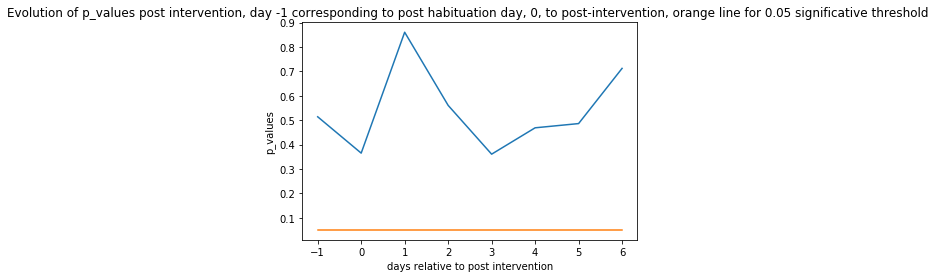

In [64]:
df = df_soir
column = "masking volume"
distrib_ref = create_distrib_ref(df, column)
make_daily_statistical_tests_and_display(df, distrib_ref, column)


# Tests stats for morning VAS-L comparing to pre-intervention baseline

test unilatéral de différence avec la distribution de référence pour le jour -1
0 étant le jour post intervention
Student T-Test : 
0.2807173538512032
Wilcoxon T-test :
0.3232311013320848

test unilatéral de différence avec la distribution de référence pour le jour 0
0 étant le jour post intervention
Student T-Test : 
0.037332911371627454
Wilcoxon T-test :
0.02966805994045431

test unilatéral de différence avec la distribution de référence pour le jour 1
0 étant le jour post intervention
Student T-Test : 
0.49507328084384855
Wilcoxon T-test :
0.24165162080128522

test unilatéral de différence avec la distribution de référence pour le jour 2
0 étant le jour post intervention
Student T-Test : 
0.8568421124688121
Wilcoxon T-test :
0.8820573947059736

test unilatéral de différence avec la distribution de référence pour le jour 3
0 étant le jour post intervention
Student T-Test : 
0.7348911855894534
Wilcoxon T-test :
0.699910256429723

test unilatéral de différence avec la distribution de r

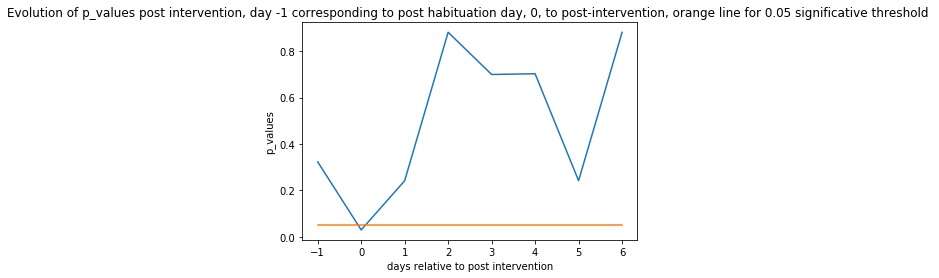

In [65]:
df = df_matin
column = "VAS-L"
distrib_ref = create_distrib_ref(df, column)
make_daily_statistical_tests_and_display(df, distrib_ref, column)

# Tests stats for morning VAS-I comparing to pre-intervention baseline

test unilatéral de différence avec la distribution de référence pour le jour -1
0 étant le jour post intervention
Student T-Test : 
0.22926360749087066
Wilcoxon T-test :
0.14209488743383902

test unilatéral de différence avec la distribution de référence pour le jour 0
0 étant le jour post intervention
Student T-Test : 
0.16246161036714318
Wilcoxon T-test :
0.16403239085041837

test unilatéral de différence avec la distribution de référence pour le jour 1
0 étant le jour post intervention
Student T-Test : 
0.5948307072747794
Wilcoxon T-test :
0.5672328374219202

test unilatéral de différence avec la distribution de référence pour le jour 2
0 étant le jour post intervention
Student T-Test : 
0.6759884227136859
Wilcoxon T-test :
0.6939550599553717

test unilatéral de différence avec la distribution de référence pour le jour 3
0 étant le jour post intervention
Student T-Test : 
0.6428983996100663
Wilcoxon T-test :
0.5672328374219202

test unilatéral de différence avec la distribution de r

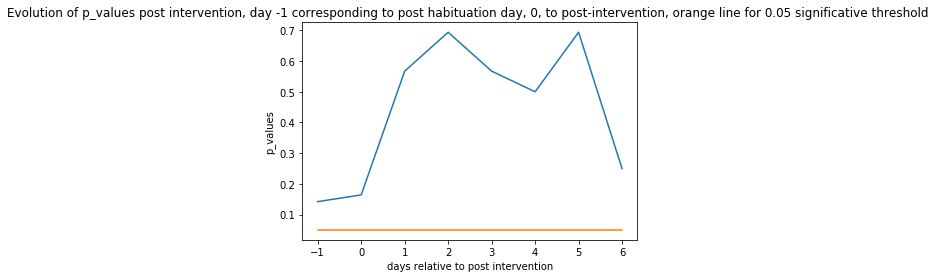

In [66]:
df = df_matin
column = "VAS-I"
distrib_ref = create_distrib_ref(df, column)
make_daily_statistical_tests_and_display(df, distrib_ref, column)